# **CM1: Data Preprocessing and Preparation**

Libraries used in CM1:

1. pandas
2. scikitlearn
3. scipy.stats.zscore

In [ ]:
# Loading the training dataset
import pandas as pd
data = pd.read_csv('/content/dkmacovid_train.csv')
data.head()

,Day,State ID,State,Lat,Long_,Active,Incident_Rate,Total_Test_Results,Case_Fatality_Ratio,Testing_Rate,Resident Population 2020 Census,Population Density 2020 Census,Density Rank 2020 Census,SexRatio,Confirmed,Deaths,Recovered
0,2,1,Alabama,32.3182,-86.9023,162449,7535.061394,1891468,1.318688,38576.31315,"5,024,279",99.2,29,94,True,False,False
1,2,2,Alaska,61.3707,-152.4044,40421,6534.252848,1290349,0.449781,176386.82510,"733,391",1.3,52,109,True,True,False
2,2,3,Arizona,33.7298,-111.4312,452222,7407.212013,5218721,1.680608,39916.14181,"7,151,502",62.9,35,99,True,True,True
3,2,4,Arkansas,34.9697,-92.3731,24012,7669.219075,2079788,1.611203,68917.26567,"3,011,524",57.9,36,96,True,True,True
4,2,5,California,36.1162,-119.6816,2362015,6045.109130,33391442,1.111215,84509.14544,"39,538,223",253.7,13,99,True,True,False


We will not need the 'State' column that has state names for our training. So, we will drop that column.

In [ ]:
# Dropping 'State' column
data = data.drop(labels=['State'], axis=1)

Removing the unnecessary ',' from '*Population Density 2020 Census*' and '*Resident Population 2020 Census*' as we want these columns to have numeric data and not string (object) to be able to perform normalization on them.

In [ ]:
# Removing ','
for i in range(len(data["Population Density 2020 Census"])):
  data["Population Density 2020 Census"][i] = data["Population Density 2020 Census"][i].replace(",", "")

for i in range(len(data["Resident Population 2020 Census"])):
  data["Resident Population 2020 Census"][i] = data["Resident Population 2020 Census"][i].replace(",", "")

# Converting the feature values to float type
data["Population Density 2020 Census"] = data["Population Density 2020 Census"].astype("float")
data["Resident Population 2020 Census"] = data["Resident Population 2020 Census"].astype("float")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# Applying Z-Score Normalization on features to bring them all in the same scale. 
from scipy.stats import zscore
for c in data.columns[:-3]:
    data[c] = zscore((data[c]))

In [ ]:
data.describe()

,Day,State ID,Lat,Long_,Active,Incident_Rate,Total_Test_Results,Case_Fatality_Ratio,Testing_Rate,Resident Population 2020 Census,Population Density 2020 Census,Density Rank 2020 Census,SexRatio
count,1.380000e+03,1.380000e+03,1.380000e+03,1.380000e+03,1.380000e+03,1.380000e+03,1.380000e+03,1.380000e+03,1.380000e+03,1.380000e+03,1.380000e+03,1.380000e+03,1.380000e+03
mean,-3.926006e-17,-1.533395e-16,7.771561e-17,5.403890e-16,8.125545e-18,-6.870511e-17,2.445709e-17,-2.431228e-16,2.413931e-16,7.683065e-17,3.620292e-19,-3.845555e-17,1.740958e-16
std,1.000363e+00,1.000363e+00,1.000363e+00,1.000363e+00,1.000363e+00,1.000363e+00,1.000363e+00,1.000363e+00,1.000363e+00,1.000363e+00,1.000363e+00,1.000363e+00,1.000363e+00
min,-1.675247e+00,-1.670726e+00,-3.028267e+00,-3.292589e+00,-5.294570e-01,-2.591349e+00,-7.006996e-01,-1.816030e+00,-1.499366e+00,-7.772782e-01,-2.768527e-01,-1.702631e+00,-1.168679e+00
25%,-8.665069e-01,-9.125308e-01,-6.328990e-01,-6.334226e-01,-4.757936e-01,-5.038901e-01,-5.666924e-01,-5.861158e-01,-5.951035e-01,-6.491616e-01,-2.507261e-01,-9.220230e-01,-8.579319e-01
50%,0.000000e+00,1.798090e-02,1.865971e-02,2.354361e-01,-3.266255e-01,1.087076e-01,-3.364643e-01,-2.007178e-01,-1.548506e-01,-2.636782e-01,-2.144664e-01,8.626289e-02,-2.364379e-01
75%,8.665069e-01,8.106391e-01,6.354145e-01,7.984616e-01,-3.658784e-03,6.157180e-01,1.177136e-01,2.822020e-01,3.120754e-01,1.638942e-01,-1.227793e-01,8.993967e-01,3.850560e-01
max,1.675247e+00,1.775614e+00,3.608919e+00,1.197327e+00,6.152536e+00,2.433814e+00,5.295209e+00,3.499064e+00,3.524940e+00,4.905194e+00,6.608040e+00,1.614954e+00,3.492526e+00


Data is now preprocessed and ready to be used for training. 

**Summary:**

After loading the data, we removed the '*State*' column as it has redundant information - the information about state can be obtained from the '*StateID*' column as well and as it is numeric and not categorical, we will keep that and remove '*State*'. 

After that, we changed the number format for the columns with demographic data. Those columns had ',' in the numbers which for Python would become string (object). So, to be able to apply number operations on these columns - '*Population Density 2020 Census*' and '*Resident Population 2020 Census*', we removed the comma and converted the string to number. 

That all the feature columns were now numeric, we applied Z-Score normalization on them to bring all data in the same scale. This is very important as our model has to learn weights based on these features. Being on the same scale, makes it much more efficient for the model to learn parameters from these features. 

We have three output (target) columns ('*Confirmed*', '*Deaths*', and '*Recovered*') in the original data and that would entail making three separate models - one for each target.

Here, we haven't applied any kind of transformations (PCA, LDA) on the feature set.

# **CM2: Default Fully Connected Deep Neural Network for Classification**

Libraries used in CM2:

1. keras
2. sklearn.model_selection.train_test_split
3. keras.models.Sequential
4. keras.models.Dense

Links used for reference:
1. https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5

2. https://keras.io/guides/sequential_model/



We will divide the training set at hand into two sets - train and validate.

In [ ]:
from sklearn.model_selection import train_test_split
trainX, validateX, trainy, validatey = train_test_split(data.iloc[:, :-3], data.iloc[:, -3:], test_size=0.2, random_state = 10)

In [ ]:
#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense, Softmax


# Neural network - three different models - one for each target
# Model for Confirmed
model_confirmed = Sequential()
model_confirmed.add(Dense(20, input_dim=13, activation='relu'))
model_confirmed.add(Dense(20, activation='relu'))
model_confirmed.add(Dense(1, activation='softmax'))

# Model for Deaths
model_deaths = Sequential()
model_deaths.add(Dense(20, input_dim=13, activation='relu'))
model_deaths.add(Dense(20, activation='relu'))
model_deaths.add(Dense(1, activation='softmax'))

# Model for Recovered
model_recovered = Sequential()
model_recovered.add(Dense(20, input_dim=13, activation='relu'))
model_recovered.add(Dense(20, activation='relu'))
model_recovered.add(Dense(1, activation='softmax'))

Each of the three models has 2 hidden layers each with ReLU (Rectified Linear Unit) as the activation function and 20 units each. Here, we could also have applied a new layer of Activation on the output of Dense Layer. However, both these ways give the same output. Just that, with the latter we would be able to use the intermediate output for some other purpose which we do not want here. Moreover, this adds more readability to the code. 
On that we apply Softmax to get the final output. 


In [ ]:
# Compiling all the three models. 

model_confirmed.compile(loss=keras.losses.binary_crossentropy, metrics=['accuracy'])
model_deaths.compile(loss=keras.losses.binary_crossentropy, metrics=['accuracy'])
model_recovered.compile(loss=keras.losses.binary_crossentropy, metrics=['accuracy'])

For all the three models we have used Binary Cross Entropy as the loss function as each of the three target columns has two classes - True and False. 

We have Accuracy as our metric for model evaluation. 

Now, we will train the models individually for 100 epochs each keeping the batch size as 64. 

In [ ]:
from time import time
print("Training History for Confirmed - Default model")
start = time()
history_confirmed = model_confirmed.fit(trainX, trainy.iloc[:, 0], epochs=100, batch_size=64, verbose=1,validation_data=(validateX, validatey.iloc[:, 0]))
default_confirmed = round(time() - start, 3)

Training History for Confirmed - Default model
Epoch 1/100
18/18 [==============================] - 1s 16ms/step - loss: 0.5654 - accuracy: 0.9648 - val_loss: 0.4025 - val_accuracy: 0.9746
Epoch 2/100
18/18 [==============================] - 0s 4ms/step - loss: 0.3879 - accuracy: 0.9630 - val_loss: 0.2884 - val_accuracy: 0.9746
Epoch 3/100
18/18 [==============================] - 0s 5ms/step - loss: 0.2873 - accuracy: 0.9602 - val_loss: 0.2106 - val_accuracy: 0.9746
Epoch 4/100
18/18 [==============================] - 0s 3ms/step - loss: 0.2176 - accuracy: 0.9629 - val_loss: 0.1611 - val_accuracy: 0.9746
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 0.1895 - accuracy: 0.9593 - val_loss: 0.1385 - val_accuracy: 0.9746
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 0.1792 - accuracy: 0.9555 - val_loss: 0.1262 - val_accuracy: 0.9746
Epoch 7/100
18/18 [==============================] - 0s 4ms/step - loss: 0.1639 - accuracy: 0.9583 - val_l

In [ ]:
print("Training History for Deaths - Default model")
start = time()
history_deaths = model_deaths.fit(trainX, trainy.iloc[:, 1], epochs=100, batch_size=64, verbose=1,validation_data=(validateX, validatey.iloc[:, 1]))
default_deaths = round(time() - start, 3)

Training History for Deaths - Default model
Epoch 1/100
18/18 [==============================] - 1s 16ms/step - loss: 0.5132 - accuracy: 0.8903 - val_loss: 0.4172 - val_accuracy: 0.9203
Epoch 2/100
18/18 [==============================] - 0s 4ms/step - loss: 0.4178 - accuracy: 0.8887 - val_loss: 0.3540 - val_accuracy: 0.9203
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 0.3724 - accuracy: 0.9009 - val_loss: 0.3223 - val_accuracy: 0.9203
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 0.3502 - accuracy: 0.8838 - val_loss: 0.3006 - val_accuracy: 0.9203
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 0.3187 - accuracy: 0.9023 - val_loss: 0.2878 - val_accuracy: 0.9203
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 0.3077 - accuracy: 0.9048 - val_loss: 0.2795 - val_accuracy: 0.9203
Epoch 7/100
18/18 [==============================] - 0s 4ms/step - loss: 0.3088 - accuracy: 0.8973 - val_loss

In [ ]:
print("Training History for Recovered - Default model")
start = time()
history_recovered = model_recovered.fit(trainX, trainy.iloc[:, 2], epochs=100, batch_size=64, verbose=1,validation_data=(validateX, validatey.iloc[:, 2]))
default_recovered = round(time() - start, 3)

Training History for Recovered - Default model
Epoch 1/100
18/18 [==============================] - 1s 18ms/step - loss: 0.6760 - accuracy: 0.6361 - val_loss: 0.6095 - val_accuracy: 0.6304
Epoch 2/100
18/18 [==============================] - 0s 4ms/step - loss: 0.5941 - accuracy: 0.6338 - val_loss: 0.5608 - val_accuracy: 0.6304
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 0.5647 - accuracy: 0.6336 - val_loss: 0.5253 - val_accuracy: 0.6304
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 0.5239 - accuracy: 0.6286 - val_loss: 0.4959 - val_accuracy: 0.6304
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 0.4951 - accuracy: 0.6225 - val_loss: 0.4710 - val_accuracy: 0.6304
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 0.4732 - accuracy: 0.6303 - val_loss: 0.4504 - val_accuracy: 0.6304
Epoch 7/100
18/18 [==============================] - 0s 4ms/step - loss: 0.4618 - accuracy: 0.6328 - val_l

# **CM3: Custom Network of Deep Neural Network for Classification**

List of libraries used in CM3:

1. tensorflow
2. pandas
3. keras
4. tensorflow.keras.layers
5. keras.layers.Dense, LSTM, BtachNormalization, Dropout
6. sklearn.utils.class_weight

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import keras
from tensorflow.keras import layers
from keras.layers import Dense, LSTM
from keras.layers import BatchNormalization, Dropout
from sklearn.utils import class_weight

In [ ]:
# Defining the custom model for Confirmed
custom_model_confirmed = Sequential()
custom_model_confirmed.add(Dropout(0.2))
custom_model_confirmed.add(Dense(10, input_dim = 13, activation=keras.activations.LeakyReLU(alpha=0.4)))
custom_model_confirmed.add(BatchNormalization())
custom_model_confirmed.add(Dropout(0.2))
custom_model_confirmed.add(Dense(10, activation=keras.activations.LeakyReLU(alpha=0.4)))
custom_model_confirmed.add(BatchNormalization())
custom_model_confirmed.add(Dropout(0.2))
custom_model_confirmed.add(Dense(10, activation=keras.activations.LeakyReLU(alpha=0.4)))
custom_model_confirmed.add(BatchNormalization())
custom_model_confirmed.add(Dense(1, activation=keras.activations.sigmoid))

Model Summary:

The custom model for *Confirmed* target has 3 hidden layers. There is a dropout of 0.2 (20%) in every layer and the output of every Dense Layer (fully connected) after activation (Leaky ReLU) is batch normalized.

The final output layer has Sigmoid activation as the target column has binary data - True and False. For Binary classification it is better to have sigmoid activation than softmax. The output of sigmoid would be the probability of each class to be considered as the output. However, we will need to apply a threshold on sigmoid's output to decide the class of the example. 

We have used Binary Cross Entropy as the loss function and Accuracy as the model's performance metric. Now, we have also used Stochastic Gradient Descent as the optimizer on the model. It smoothly helps in optimizing the objective function by estimating the gradient descent than using actual one. 

On top of that, we have used weights with the classes as the target column has imbalanced data. There are far more number of True's than False's. So, by using weights we have let the model know how much importance is to be given to an example with which class. 

In [ ]:
custom_model_confirmed.compile(loss=keras.losses.binary_crossentropy, metrics=['accuracy'], optimizer=keras.optimizers.SGD(learning_rate=1e-1))

In [ ]:
weights_confirmed = class_weight.compute_class_weight('balanced', np.unique(trainy.iloc[:, 0]), trainy.iloc[:, 0])
print(weights_confirmed)

[12.54545455  0.52075472]


In [ ]:
start = time()
custom_model_confirmed_train_history = custom_model_confirmed.fit(trainX, trainy.iloc[:, 0], epochs=100, batch_size=32, verbose=1,validation_data=(validateX, validatey.iloc[:, 0]), class_weight={0:0.52, 1:12.54})
custom_confirmed = round(time() - start, 3)

Epoch 1/100
35/35 [==============================] - 3s 18ms/step - loss: 1.8080 - accuracy: 0.9080 - val_loss: 0.1458 - val_accuracy: 0.9746
Epoch 2/100
35/35 [==============================] - 0s 5ms/step - loss: 0.1644 - accuracy: 0.9603 - val_loss: 0.1568 - val_accuracy: 0.9746
Epoch 3/100
35/35 [==============================] - 0s 5ms/step - loss: 0.1661 - accuracy: 0.9559 - val_loss: 0.1610 - val_accuracy: 0.9746
Epoch 4/100
35/35 [==============================] - 0s 5ms/step - loss: 0.1315 - accuracy: 0.9672 - val_loss: 0.1605 - val_accuracy: 0.9746
Epoch 5/100
35/35 [==============================] - 0s 5ms/step - loss: 0.1332 - accuracy: 0.9662 - val_loss: 0.1608 - val_accuracy: 0.9746
Epoch 6/100
35/35 [==============================] - 0s 5ms/step - loss: 0.1513 - accuracy: 0.9595 - val_loss: 0.1605 - val_accuracy: 0.9746
Epoch 7/100
35/35 [==============================] - 0s 5ms/step - loss: 0.1502 - accuracy: 0.9598 - val_loss: 0.1612 - val_accuracy: 0.9746
Epoch 8/100


In [ ]:
custom_model_confirmed.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_11 (Dropout)         (None, 13)                0         
_________________________________________________________________
dense_42 (Dense)             (None, 10)                140       
_________________________________________________________________
batch_normalization_13 (Batc (None, 10)                40        
_________________________________________________________________
dropout_12 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_43 (Dense)             (None, 10)                110       
_________________________________________________________________
batch_normalization_14 (Batc (None, 10)                40        
_________________________________________________________________
dropout_13 (Dropout)         (None, 10)              

In [ ]:
# Defining the custom model for Deaths
custom_model_deaths = Sequential()
custom_model_deaths.add(Dense(20, input_dim = 13, activation=keras.activations.elu))
custom_model_deaths.add(BatchNormalization())
custom_model_deaths.add(Dense(20, activation=keras.activations.elu))
custom_model_deaths.add(BatchNormalization())
custom_model_deaths.add(Dense(20, activation=keras.activations.elu))
custom_model_deaths.add(BatchNormalization())
custom_model_deaths.add(Dense(20, activation=keras.activations.elu))
custom_model_deaths.add(BatchNormalization())
custom_model_deaths.add(Dense(20, activation=keras.activations.elu))
custom_model_deaths.add(BatchNormalization())
custom_model_deaths.add(Dense(20, activation=keras.activations.elu))
custom_model_deaths.add(BatchNormalization())
custom_model_deaths.add(Dense(1, activation=keras.activations.sigmoid))

Model Summary:

The cutsom model for *Deaths* target has 6 dense layers with 20 units each. The activation function for each dense layer is Exponential Linear Unit (ELU) - ELU is a significant imporovement over ReLU as it does not make zero every negative value and gives them but a little (as required) importance. By completely neglecting them, the impact that they actually have on the model gets ignored which we do not want. 

We have also used Batch Normlization so that every batch has all data standardized. This helps learning the parameters better. 

On the final output we have applied sigmoid activation as the target has binary classess - True and False. Sigmoid works better for binary data than Softmax. 

We have used Adam optimizer for this model with Binary Cross Entropy as the loss function and accuracy as the metric for model performance.

We have also used class weights as there is an imbalance in the frequncy of True and False. 

ELU - Exponential Linear Unit:

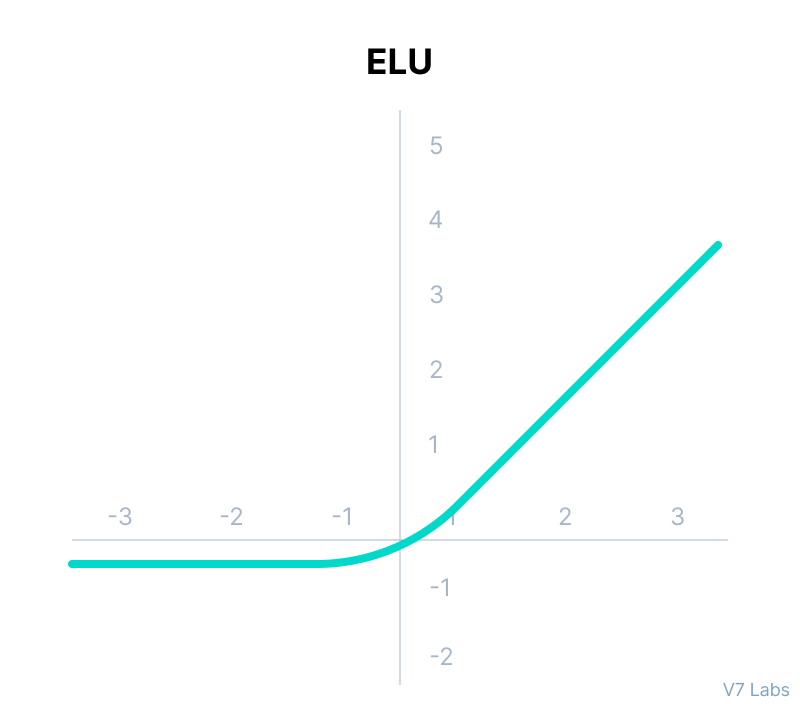


Image Source:  https://assets.website-files.com/5d7b77b063a9066d83e1209c/60d248d0a17eb381ecce9489_pasted%20image%200%20(13).jpg

In [ ]:
custom_model_deaths.compile(loss=keras.losses.binary_crossentropy, metrics=['accuracy'], optimizer=keras.optimizers.Adam(learning_rate=1e-1))

In [ ]:
weights_deaths = class_weight.compute_class_weight('balanced', np.unique(trainy.iloc[:, 1]), trainy.iloc[:, 1])
print(weights_deaths)

[4.84210526 0.55757576]


In [ ]:
start = time()
custom_model_deaths_training_history = custom_model_deaths.fit(trainX, trainy.iloc[:, 1], epochs=100, batch_size=128, verbose=1,validation_data=(validateX, validatey.iloc[:, 1]),class_weight={0:0.56, 1:4.84})
custom_deaths = round(time() - start, 3)

Epoch 1/100
9/9 [==============================] - 3s 69ms/step - loss: 2.0804 - accuracy: 0.7354 - val_loss: 31.0831 - val_accuracy: 0.1377
Epoch 2/100
9/9 [==============================] - 0s 10ms/step - loss: 0.3805 - accuracy: 0.8899 - val_loss: 235.5837 - val_accuracy: 0.3188
Epoch 3/100
9/9 [==============================] - 0s 10ms/step - loss: 0.4130 - accuracy: 0.8870 - val_loss: 164.6002 - val_accuracy: 0.5109
Epoch 4/100
9/9 [==============================] - 0s 10ms/step - loss: 0.3510 - accuracy: 0.8826 - val_loss: 38.3625 - val_accuracy: 0.4964
Epoch 5/100
9/9 [==============================] - 0s 8ms/step - loss: 0.2619 - accuracy: 0.9055 - val_loss: 16.0051 - val_accuracy: 0.5507
Epoch 6/100
9/9 [==============================] - 0s 11ms/step - loss: 0.2589 - accuracy: 0.8995 - val_loss: 11.8409 - val_accuracy: 0.5978
Epoch 7/100
9/9 [==============================] - 0s 9ms/step - loss: 0.2476 - accuracy: 0.9028 - val_loss: 6.6623 - val_accuracy: 0.6014
Epoch 8/100
9/

In [ ]:
custom_model_deaths.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 20)                280       
_________________________________________________________________
batch_normalization_16 (Batc (None, 20)                80        
_________________________________________________________________
dense_47 (Dense)             (None, 20)                420       
_________________________________________________________________
batch_normalization_17 (Batc (None, 20)                80        
_________________________________________________________________
dense_48 (Dense)             (None, 20)                420       
_________________________________________________________________
batch_normalization_18 (Batc (None, 20)                80        
_________________________________________________________________
dense_49 (Dense)             (None, 20)              

In [ ]:
# Defining the custom model for Recovered
custom_model_recovered = Sequential()
custom_model_recovered.add(Dense(10, input_dim = 13, activation=keras.activations.tanh))
custom_model_recovered.add(BatchNormalization())
custom_model_recovered.add(Dense(10, activation=keras.activations.tanh))
custom_model_recovered.add(BatchNormalization())
custom_model_recovered.add(Dense(10, activation=keras.activations.tanh))
custom_model_recovered.add(BatchNormalization())
custom_model_recovered.add(Dense(10, activation=keras.activations.tanh))
custom_model_recovered.add(BatchNormalization())
custom_model_recovered.add(Dense(1, activation=keras.activations.sigmoid))

Model Summary:

The custom model for *Recovered* target has four hidden layers with 10 units eaach with tanh as the activation function. We have applied Batch Normalization  to give standardized inputs to the layers to help learn the parameters better. 

We have used Sigmoid as teh activation on the final output layer as the target has bunary classes - True and False. 

We have used Stochastic Gradient Descent as the optimizer and kept the learning rate as 0.1. 

We have given class weights at the time of training the model as the traget column has imbalances classes. There is a disproportionate amount of True and False in the target column. 

tanh: 

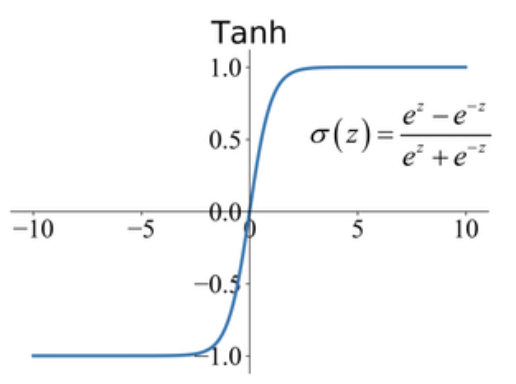

Image Source:  https://paperswithcode.com/media/methods/Screen_Shot_2020-05-27_at_4.23.22_PM_dcuMBJl.png

In [ ]:
custom_model_recovered.compile(loss=keras.losses.binary_crossentropy, metrics=['accuracy'], optimizer=keras.optimizers.SGD(learning_rate=1e-1))

In [ ]:
weights_recovered = class_weight.compute_class_weight('balanced', np.unique(trainy.iloc[:, 2]), trainy.iloc[:, 2])
print(weights_recovered)

[1.33333333 0.8       ]


In [ ]:
start = time()
custom_model_recovered_training_history = custom_model_recovered.fit(trainX, trainy.iloc[:, 2], epochs=100, batch_size=64, verbose=1,validation_data=(validateX, validatey.iloc[:, 2]),class_weight={0:0.8, 1:1.33})
custom_recovered = round(time() - start, 3)

Epoch 1/100
18/18 [==============================] - 2s 30ms/step - loss: 0.8164 - accuracy: 0.5955 - val_loss: 0.5999 - val_accuracy: 0.6304
Epoch 2/100
18/18 [==============================] - 0s 6ms/step - loss: 0.4536 - accuracy: 0.8077 - val_loss: 0.6259 - val_accuracy: 0.6304
Epoch 3/100
18/18 [==============================] - 0s 6ms/step - loss: 0.3764 - accuracy: 0.8475 - val_loss: 0.5470 - val_accuracy: 0.6812
Epoch 4/100
18/18 [==============================] - 0s 6ms/step - loss: 0.3469 - accuracy: 0.8651 - val_loss: 0.5097 - val_accuracy: 0.6920
Epoch 5/100
18/18 [==============================] - 0s 6ms/step - loss: 0.2978 - accuracy: 0.8889 - val_loss: 0.4476 - val_accuracy: 0.7500
Epoch 6/100
18/18 [==============================] - 0s 7ms/step - loss: 0.2625 - accuracy: 0.9127 - val_loss: 0.3986 - val_accuracy: 0.8043
Epoch 7/100
18/18 [==============================] - 0s 6ms/step - loss: 0.2996 - accuracy: 0.8934 - val_loss: 0.3749 - val_accuracy: 0.8333
Epoch 8/100


In [ ]:
custom_model_recovered.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 10)                140       
_________________________________________________________________
batch_normalization_22 (Batc (None, 10)                40        
_________________________________________________________________
dense_54 (Dense)             (None, 10)                110       
_________________________________________________________________
batch_normalization_23 (Batc (None, 10)                40        
_________________________________________________________________
dense_55 (Dense)             (None, 10)                110       
_________________________________________________________________
batch_normalization_24 (Batc (None, 10)                40        
_________________________________________________________________
dense_56 (Dense)             (None, 10)              

# **CM4: Result Analysis**

List of libraries used in CM4:

1. matplotlib.pyplot
2. keras.models
3. time

Links used for reference:
1. https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html



Let us compare how much time each model takes for training for both - default and custom architecture of neural network. 

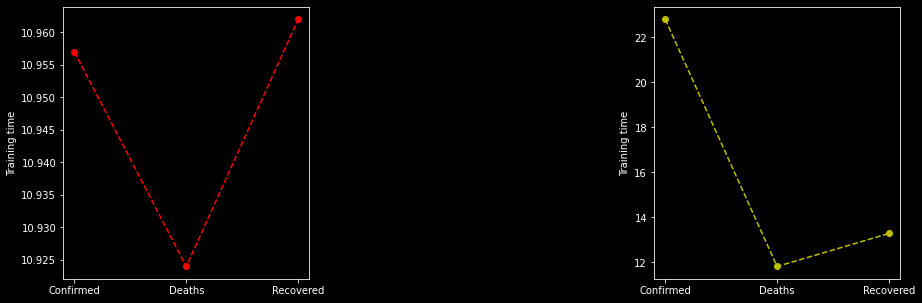

In [ ]:
import matplotlib.pyplot as plt
f = plt.figure(figsize=(15, 5))
ax1 = f.add_subplot(1,3,1)
ax2 = f.add_subplot(1,3,3)

ax1.plot(['Confirmed', 'Deaths', 'Recovered'], [default_confirmed, default_deaths, default_recovered], 'ro--')
ax1.set_facecolor('black')
ax1.set_ylabel("Training time")
ax2.plot(['Confirmed', 'Deaths', 'Recovered'], [custom_confirmed, custom_deaths, custom_recovered], 'yo--')
ax2.set_ylabel("Training time")
ax2.set_facecolor('black')


[Text(0, 0, 'False'), Text(0, 0, 'True')]

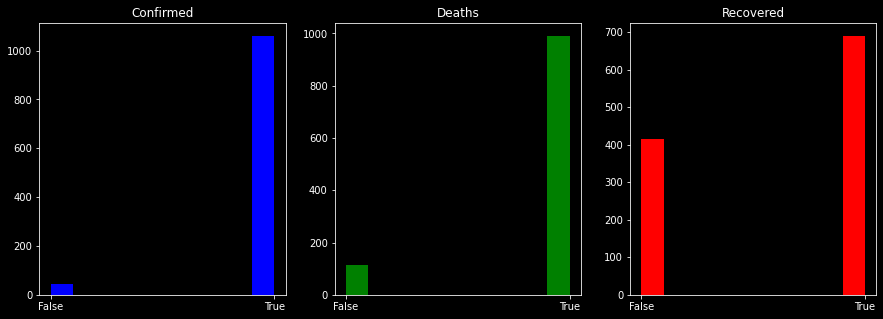

In [ ]:
f = plt.figure(figsize=(15,5))
ax1 = f.add_subplot(131)
ax1.set_facecolor('black')
ax2 = f.add_subplot(132)
ax2.set_facecolor('black')
ax3 = f.add_subplot(133)
ax3.set_facecolor('black')

ax1.hist(trainy.iloc[:, 0].astype(int), color="blue")
ax1.set_title("Confirmed")
ax1.set_xticks(ticks=[0,1])
ax1.set_xticklabels(["False","True"])
ax2.hist(trainy.iloc[:, 1].astype(int), color="green")
ax2.set_title("Deaths")
ax2.set_xticks(ticks=[0,1])
ax2.set_xticklabels(["False","True"])
ax3.hist(trainy.iloc[:, 2].astype(int), color="red")
ax3.set_title("Recovered")
ax3.set_xticks(ticks=[0,1])
ax3.set_xticklabels(["False","True"])

Now, we will compare the train and validation accuracies for both the models - Default and custom. We will also compare their losses w.r.t the epochs. 

To do so, we will plot the accuracies and losses against the epoch for both the models side by side. 

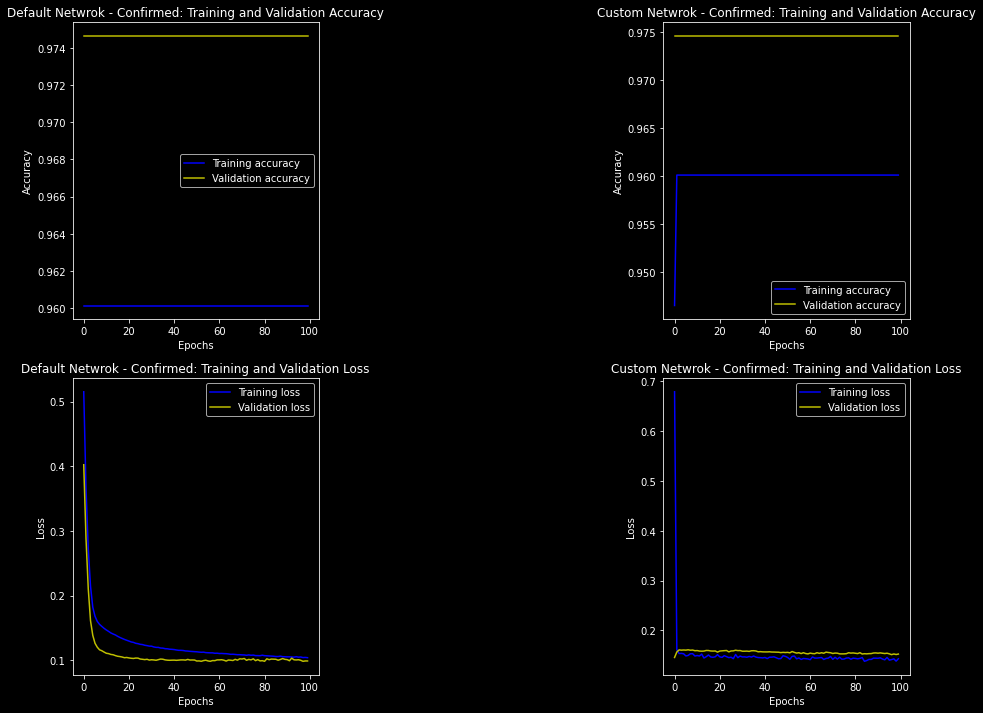

In [ ]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(15,12))
ax1 = f.add_subplot(231)
ax1.set_facecolor('black')
ax2 = f.add_subplot(234)
ax2.set_facecolor('black')
ax3 = f.add_subplot(233)
ax3.set_facecolor('black')
ax4 = f.add_subplot(236)
ax4.set_facecolor('black')

accuracy = history_confirmed.history['accuracy']
val_accuracy = history_confirmed.history['val_accuracy']
loss = history_confirmed.history['loss']
val_loss = history_confirmed.history['val_loss']
epochs = range(len(accuracy))
# plt.subplot(2,3,1)
ax1.plot(epochs, accuracy, 'b-', label='Training accuracy')
ax1.plot(epochs, val_accuracy, 'y-', label='Validation accuracy')
ax1.set_title('Default Netwrok - Confirmed: Training and Validation Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

ax2.plot(epochs, loss, 'b', label='Training loss')
ax2.plot(epochs, val_loss, 'y-', label='Validation loss')
ax2.set_title('Default Netwrok - Confirmed: Training and Validation Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()


accuracy = custom_model_confirmed_train_history.history['accuracy']
val_accuracy = custom_model_confirmed_train_history.history['val_accuracy']
loss = custom_model_confirmed_train_history.history['loss']
val_loss = custom_model_confirmed_train_history.history['val_loss']
epochs = range(len(accuracy))
# plt.subplot(2,3,3)
ax3.plot(epochs, accuracy, 'b-', label='Training accuracy')
ax3.plot(epochs, val_accuracy, 'y-', label='Validation accuracy')
ax3.set_title('Custom Netwrok - Confirmed: Training and Validation Accuracy')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('Accuracy')
ax3.legend()

ax4.plot(epochs, loss, 'b-', label='Training loss')
ax4.plot(epochs, val_loss, 'y-', label='Validation loss')
ax4.set_title('Custom Netwrok - Confirmed: Training and Validation Loss')
ax4.set_xlabel('Epochs')
ax4.set_ylabel('Loss')
ax4.legend()
plt.show()

From the above graphs we can see that for the default model trained for *Confirmed* we get constant training and validation accuracies irrespective of increase in epochs. This can be because it is stuck in a state and is not able to get out of it. This can be potentially solved by introducing an optimizer in the model architecture. 

At the same time, the custom model is also showing as similar behavior in training accuracy. The validation accuracy is increasing in the beginning until it reaches a local optima and then is stuck there. This can be solved probably by introducing more complexity in the architectrue. 

For loss, with increase in epochs, the default model sees a steep decrease iinitially and then a slow decrease later on. At the same time, the custom model also sees the decline in loss over epochs for trainign data wheras teh validation loss remains the same. This is justified as we saw that validation accuracy is also not improving or deteriorating. So, it is only expected that loss also does not chagne - again because it is stuck in some local optima. 

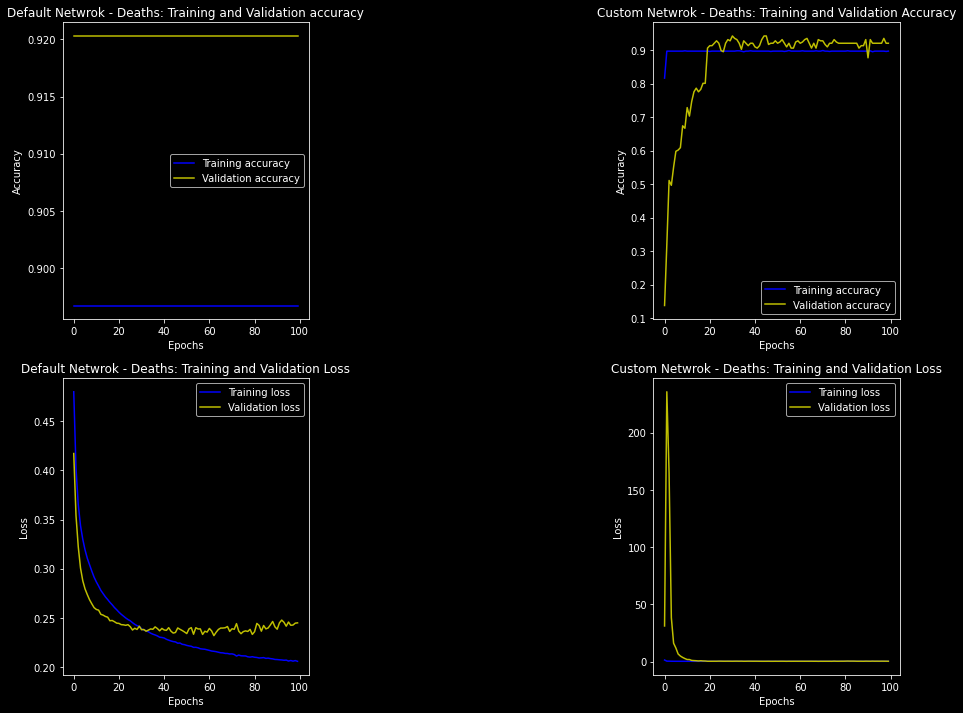

In [ ]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(15,12))
ax1 = f.add_subplot(231)
ax1.set_facecolor('black')
ax2 = f.add_subplot(234)
ax2.set_facecolor('black')
ax3 = f.add_subplot(233)
ax3.set_facecolor('black')
ax4 = f.add_subplot(236)
ax4.set_facecolor('black')

accuracy = history_deaths.history['accuracy']
val_accuracy = history_deaths.history['val_accuracy']
loss = history_deaths.history['loss']
val_loss = history_deaths.history['val_loss']
epochs = range(len(accuracy))
# plt.subplot(2,3,1)
ax1.plot(epochs, accuracy, 'b-', label='Training accuracy')
ax1.plot(epochs, val_accuracy, 'y-', label='Validation accuracy')
ax1.set_title('Default Netwrok - Deaths: Training and Validation accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

ax2.plot(epochs, loss, 'b-', label='Training loss')
ax2.plot(epochs, val_loss, 'y-', label='Validation loss')
ax2.set_title('Default Netwrok - Deaths: Training and Validation Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()


accuracy = custom_model_deaths_training_history.history['accuracy']
val_accuracy = custom_model_deaths_training_history.history['val_accuracy']
loss = custom_model_deaths_training_history.history['loss']
val_loss = custom_model_deaths_training_history.history['val_loss']
epochs = range(len(accuracy))
# plt.subplot(2,3,3)
ax3.plot(epochs, accuracy, 'b-', label='Training accuracy')
ax3.plot(epochs, val_accuracy, 'y-', label='Validation accuracy')
ax3.set_title('Custom Netwrok - Deaths: Training and Validation Accuracy')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('Accuracy')
ax3.legend()

ax4.plot(epochs, loss, 'b-', label='Training loss')
ax4.plot(epochs, val_loss, 'y-', label='Validation loss')
ax4.set_title('Custom Netwrok - Deaths: Training and Validation Loss')
ax4.set_xlabel('Epochs')
ax4.set_ylabel('Loss')
ax4.legend()
plt.show()

From the above graphs we can see that for the default model trained for *Deaths* we get constant training and validation accuracies irrespective of increase in epochs. 
Whereras, there is a significant fluctuation in accuracies for custom model. The fluctuation in trainign accuracy of custom is still not that clear however, the validation accuracy sees significant fluctuations while increasing with epochs too.  

For loss, with increase in epochs, the default model sees a gradual decrease iinitially and a slow decrease later on. At the same time, the custom model also sees the decline in loss over epochs but the decline is not smooth and there are fluctuations for validation loss in the beginning and then it gets constant. 

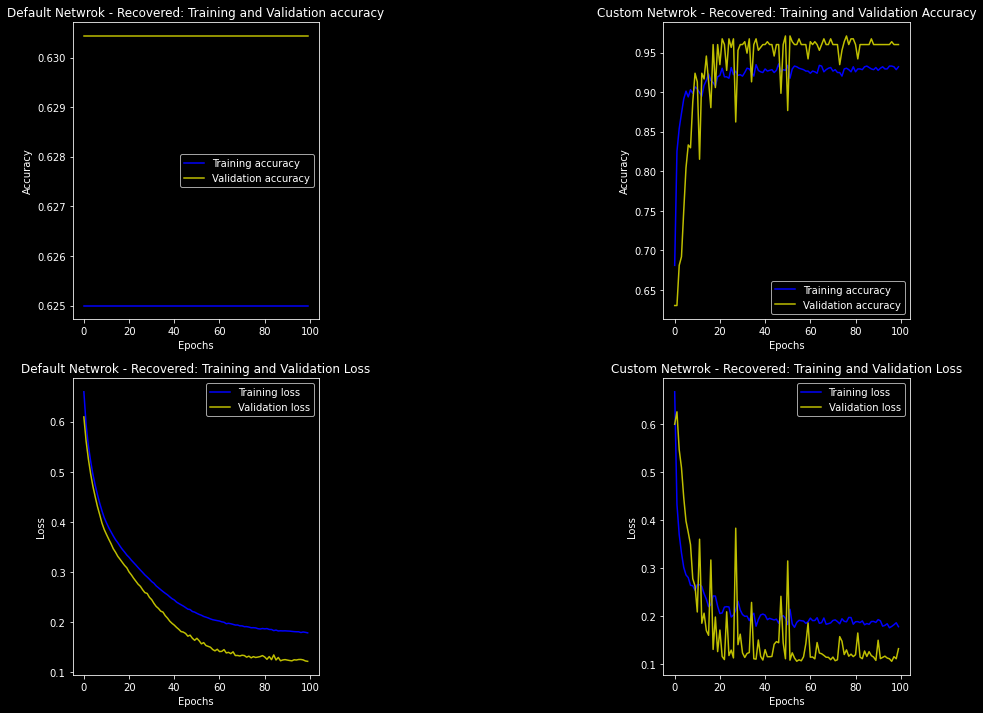

In [ ]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(15,12))
ax1 = f.add_subplot(231)
ax1.set_facecolor('black')
ax2 = f.add_subplot(234)
ax2.set_facecolor('black')
ax3 = f.add_subplot(233)
ax3.set_facecolor('black')
ax4 = f.add_subplot(236)
ax4.set_facecolor('black')

accuracy = history_recovered.history['accuracy']
val_accuracy = history_recovered.history['val_accuracy']
loss = history_recovered.history['loss']
val_loss = history_recovered.history['val_loss']
epochs = range(len(accuracy))
# plt.subplot(2,3,1)
ax1.plot(epochs, accuracy, 'b-', label='Training accuracy')
ax1.plot(epochs, val_accuracy, 'y-', label='Validation accuracy')
ax1.set_title('Default Netwrok - Recovered: Training and Validation accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

ax2.plot(epochs, loss, 'b-', label='Training loss')
ax2.plot(epochs, val_loss, 'y-', label='Validation loss')
ax2.set_title('Default Netwrok - Recovered: Training and Validation Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()


accuracy = custom_model_recovered_training_history.history['accuracy']
val_accuracy = custom_model_recovered_training_history.history['val_accuracy']
loss = custom_model_recovered_training_history.history['loss']
val_loss = custom_model_recovered_training_history.history['val_loss']
epochs = range(len(accuracy))
# plt.subplot(2,3,3)
ax3.plot(epochs, accuracy, 'b-', label='Training accuracy')
ax3.plot(epochs, val_accuracy, 'y-', label='Validation accuracy')
ax3.set_title('Custom Netwrok - Recovered: Training and Validation Accuracy')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('Accuracy')
ax3.legend()

ax4.plot(epochs, loss, 'b-', label='Training loss')
ax4.plot(epochs, val_loss, 'y-', label='Validation loss')
ax4.set_title('Custom Netwrok - Recovered: Training and Validation Loss')
ax4.set_xlabel('Epochs')
ax4.set_ylabel('Loss')
ax4.legend()
plt.show()

From the above graphs we can see that for the default model trained for *Recovered* we get constant training and validation accuracies irrespective of increase in epochs. 

Whereras, there is a significant fluctuation in accuracies for custom model. The validation accuracy of the custom model fluctuates but also increases with increase in epochs. 

For loss, with increase in epochs, the default model sees a gradual decrease iinitially and a slow decrease later on. At the same time, the custom model also sees the decline in loss over epochs but the decline is not smooth and there are fluctuations. 

Other possible architectures:

We could have used RESNET (Residual network) architecture in the custom models, but we did not because RESNETs are usually used and trained for computer vision problems. Our problem is nt even remotely related to CV problems.

We could have used RNN (Recurrent Neural Network) or LSTM (Long Short-term Memory) architectures as well. However, i tried using LSTM layers in the models and still found the results to not improve. If anything, the results of these custom models are far better than LSTM's. LSTM should have helped as we want the model to remember previous information but only for a short term. But, here, the data is not coming in order. We can have Day 1's data coming after Day 11's. Now, given the problem statement of determing the Covid cases, Day 11's data would not help in understaning Day 1's behavior. Probably this is the reason why LSTM would have not shown desired behavior. 

So, I dropped the idea of using any of these architectures and implemented a custom architecture that has dropout layers and batch normalization. Also, I tried to not create too complex a model. 

# **CM5: Kaggle Test**

**Name:** Harshil Dharmendrabhai Kapadia

**ID:** 20877987

**Kaggle URL:** https://www.kaggle.com/harshildkapadia

**Group Number:** 16

In [ ]:
test_data = pd.read_csv('/content/dkmacovid_kaggletest_features.csv')
test_data.head()

,Id,Day,State ID,State,Lat,Long_,Active,Incident_Rate,Total_Test_Results,Case_Fatality_Ratio,Testing_Rate,Resident Population 2020 Census,Population Density 2020 Census,Density Rank 2020 Census,SexRatio
0,0,2,14,Illinois,40.3495,-88.9861,957138,7697.015291,13436652,1.867428,106035.6834,"12,812,508",230.8,14,97
1,5,3,14,Illinois,40.3495,-88.9861,961499,7732.282519,13482117,1.869933,106394.4716,"12,812,508",230.8,14,97
2,10,4,14,Illinois,40.3495,-88.9861,966468,7772.205747,13530371,1.869466,106775.2693,"12,812,508",230.8,14,97
3,15,5,14,Illinois,40.3495,-88.9861,973157,7826.175891,13617454,1.871700,107462.4870,"12,812,508",230.8,14,97
4,20,6,14,Illinois,40.3495,-88.9861,980553,7885.906848,13698428,1.874835,108101.4954,"12,812,508",230.8,14,97


In [ ]:
test_data.drop('State', axis=1, inplace=True)

In [ ]:
for i in range(len(test_data["Resident Population 2020 Census"])):
  test_data["Resident Population 2020 Census"][i] = test_data["Resident Population 2020 Census"][i].replace(",", "")

test_data["Population Density 2020 Census"] = test_data["Population Density 2020 Census"].astype("float")
test_data["Resident Population 2020 Census"] = test_data["Resident Population 2020 Census"].astype("float")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
from scipy.stats import zscore
for c in test_data.columns[1:]:
    test_data[c] = zscore((test_data[c]))

In [ ]:
confirmed_y = custom_model_confirmed.predict(test_data.iloc[:, 1:])
deaths_y = custom_model_deaths.predict(test_data.iloc[:, 1:])
recovered_y = custom_model_recovered.predict(test_data.iloc[:, 1:])

In [ ]:
confirmed_y

array([[0.9989926 ],
       [0.99897563],
       [0.9989612 ],
       [0.9989473 ],
       [0.9989322 ],
       [0.99891603],
       [0.998906  ],
       [0.99890494],
       [0.99890125],
       [0.998899  ],
       [0.9988943 ],
       [0.9988888 ],
       [0.9988877 ],
       [0.9988813 ],
       [0.99887186],
       [0.99887353],
       [0.9988681 ],
       [0.9988689 ],
       [0.99885964],
       [0.9988502 ],
       [0.99884975],
       [0.9988574 ],
       [0.9988702 ],
       [0.998877  ],
       [0.9988789 ],
       [0.99888355],
       [0.9988863 ],
       [0.9988966 ],
       [0.9989096 ],
       [0.9989146 ],
       [0.9984493 ],
       [0.9984432 ],
       [0.9983902 ],
       [0.99839103],
       [0.9983277 ],
       [0.99832326],
       [0.99825495],
       [0.9982377 ],
       [0.9982071 ],
       [0.9981889 ],
       [0.99809307],
       [0.99806935],
       [0.9980332 ],
       [0.9980101 ],
       [0.9979215 ],
       [0.9978957 ],
       [0.9978733 ],
       [0.997

In [ ]:
test_results = test_data.filter(['Id'])

In [ ]:
for i in range(len(confirmed_y)):
  if confirmed_y[i].astype(float) >= 0.5:
    confirmed_y[i] = 1
  else:
    confirmed_y[i] = 0

In [ ]:
for i in range(len(deaths_y)):
  if deaths_y[i].astype(float) >= 0.5:
    deaths_y[i] = 1
  else:
    deaths_y[i] = 0

for i in range(len(recovered_y)):
  if recovered_y[i].astype(float) >= 0.5:
    recovered_y[i] = 1
  else:
    recovered_y[i] = 0

In [ ]:
test_results['Confirmed'] = confirmed_y.astype(int)
test_results['Deaths'] = confirmed_y.astype(int)
test_results['Recovered'] = confirmed_y.astype(int)

In [ ]:
test_results.to_csv('results.csv')

# **CM6: Classification with Convolutional Neural Networks**

List of libraries used in CM6:

1. pandas
2. tensorflow.keras.utils.to_categorical
3. sklearn.model_selection.train_test_split
4. keras.models.Sequential,Input,Model
5. keras.layers.Dense, Dropout, Flatten
6. keras.layers.Conv2D, MaxPooling2D
7. keras.layers.normalization.BatchNormalization
8. keras.layers.advanced_activations.LeakyReLU, ReLU

Links:

1. https://www.datacamp.com/community/tutorials/convolutional-neural-networks-python

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Copying files from drive to Google Colab's local file system
!cp drive/MyDrive/trainX.csv .
!cp drive/MyDrive/testX.csv .
!cp drive/MyDrive/trainy.csv .
!cp drive/MyDrive/testy.csv .

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
# Loading datasets
trainX = pd.read_csv('trainX.csv')

testX = pd.read_csv('testX.csv')

trainy = pd.read_csv('trainy.csv')

testy = pd.read_csv('testy.csv')

In [ ]:
print(trainX.shape)
trainX.head()

(60000, 785)


,Id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,10000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,10001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,10002,0,0,0,0,0,0,0,0,1,0,0,44,48,147,59,0,78,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,...,189,113,111,113,27,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,98,33,70,72,74,46,68,37,40,31,9,0,0,0,0,0,0,0,0
3,10003,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,10004,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Here, we can see that there is an additional column '*Id*' which we do not want - neither for training nor for testing. So, we will now drop that for all four dataframes. 

We can also see that we have flattened image in our feature. CNN needs a 2D matrix. So, we will have to reshape the features. 

In [ ]:
# Dropping Id column from all datasets
trainX.drop('Id', axis=1, inplace = True)

testX.drop('Id', axis=1, inplace = True)

trainy.drop('Id', axis=1, inplace = True)

testy.drop('Id', axis=1, inplace = True)

In [ ]:
# Changing the shapes of features in dataframe to make it suitable for CNN
# new shape = (number_of_examples, height(28), width(28), channels)
trainX = trainX.values.reshape((-1, 28, 28, 1))
testX = testX.values.reshape((-1, 28, 28, 1))
print('x_train:', trainX.shape)
print('x_test:', testX.shape)

x_train: (60000, 28, 28, 1)
x_test: (10000, 28, 28, 1)


In [ ]:
# Converting the pixel values from integer to float and normalizing to bring everything in range 0 to 1.
trainX = trainX.astype(float)/255.0
testX = testX.astype(float)/255.0

In [ ]:
# Applying one hot encoding on label as it will make it more convenient for CNN
from tensorflow.keras.utils import to_categorical
trainy_onehot = to_categorical(trainy)
testy_onehot = to_categorical(testy)

In [ ]:
# Creating the train and validation set split (90-10)
from sklearn.model_selection import train_test_split
trainX_data, validateX_data, trainy_data, validatey_data = train_test_split(trainX, trainy_onehot, test_size=0.1, random_state=10)

In [ ]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU, ReLU

Method 1: Basic CNN Architecture with no dropout or batch normalization

In [ ]:
# Defining model parameters that are static
batch_size = 64
epochs = 20
num_classes = 5

In [ ]:
# Defining the model
basic_cnn_model = Sequential()
# Conv Layer
basic_cnn_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
# Activation - ReLU
basic_cnn_model.add(LeakyReLU(alpha=0.1))
# Max pooling 
basic_cnn_model.add(MaxPooling2D((2, 2),padding='same'))
# Conv Layer
basic_cnn_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
# Activation - ReLU
basic_cnn_model.add(LeakyReLU(alpha=0.1))
# Max Pool
basic_cnn_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
# Conv Layer
basic_cnn_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
# Activation - ReLU
basic_cnn_model.add(LeakyReLU(alpha=0.1))  
# Max Pool                
basic_cnn_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
# Conv Layer
basic_cnn_model.add(Conv2D(256, (3, 3), activation='linear',padding='same'))
# Activation - ReLU
basic_cnn_model.add(LeakyReLU(alpha=0.1))  
# Max Pool                
basic_cnn_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
# Flattening the input for next layer
basic_cnn_model.add(Flatten())
# FC Layer
basic_cnn_model.add(Dense(256, activation='linear'))
basic_cnn_model.add(LeakyReLU(alpha=0.1))
# Final Layer - Fully Connected with 5 units as we have 5 output classes
basic_cnn_model.add(Dense(num_classes, activation='softmax'))

In [ ]:
basic_cnn_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
basic_cnn_model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_24 (LeakyReLU)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_25 (LeakyReLU)   (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 7, 7, 128)       

**Model Summary:**

As we can see in the above iutput, we have 4 convolution layers in total -  each followed by an activation function (LeakyReLU) to add non-linearity and then MaxPool to reduce the spatial information further.

The output of every MaxPool serves as input to the next Conv layer.

After that, the output is falttened to be given to a dense layer (fully connected) with as many units as the last Conv layer. As we added a fully connected layer, we will need to add an activation layer of Leaky ReLU. 

The output from here will be passed to the final output layer which has softmax as the activation function with as many units as the number of classes - here 5. 

**Why LeakyReLU?**

We could have used ReLU (Rectified Linear Unit) instead of LeakyReLU but we did not because of obvious issues with ReLU which are overcome by LeakyReLU. The problem of dying ReLU is solved by LeakyReLU.



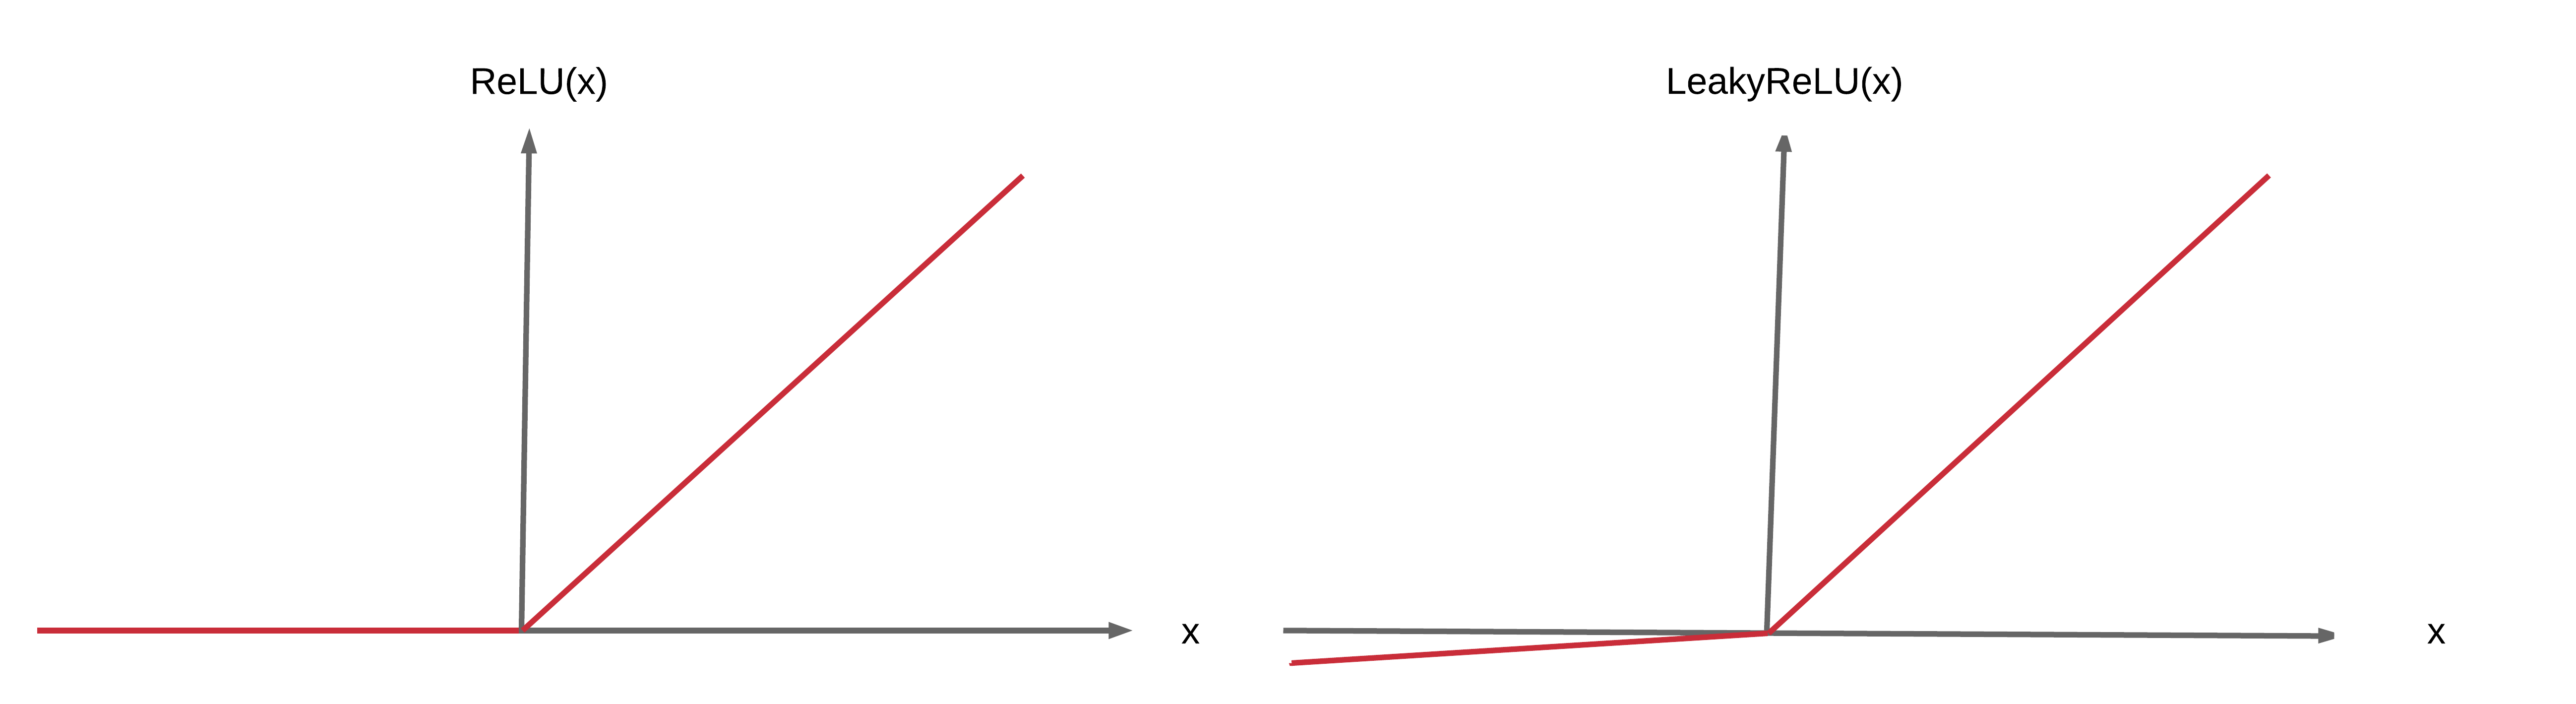

Image source: https://www.deeplearningwizard.com/deep_learning/boosting_models_pytorch/images/leaky_relu_compare2.png

Dying ReLU problem is caused as it considers all the negative values as 0. So, a neuron which is stuck with negative values would become a dead neuron making no impact on the training when it certainly should. With LeakyReLU the negative values are given but little significance and thereby not neglecting them altogether. 

In [ ]:
from time import time
start = time()
basic_cnn_model_train_history = basic_cnn_model.fit(trainX_data, trainy_data, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(validateX_data, validatey_data))
basic_cnn = round(time()-start, 3)

Epoch 1/20
844/844 [==============================] - 6s 6ms/step - loss: 0.7091 - accuracy: 0.6890 - val_loss: 0.4231 - val_accuracy: 0.8382
Epoch 2/20
844/844 [==============================] - 4s 5ms/step - loss: 0.3694 - accuracy: 0.8498 - val_loss: 0.3420 - val_accuracy: 0.8550
Epoch 3/20
844/844 [==============================] - 4s 5ms/step - loss: 0.3105 - accuracy: 0.8722 - val_loss: 0.3558 - val_accuracy: 0.8567
Epoch 4/20
844/844 [==============================] - 4s 5ms/step - loss: 0.2703 - accuracy: 0.8890 - val_loss: 0.2987 - val_accuracy: 0.8737
Epoch 5/20
844/844 [==============================] - 4s 5ms/step - loss: 0.2423 - accuracy: 0.9027 - val_loss: 0.2776 - val_accuracy: 0.8868
Epoch 6/20
844/844 [==============================] - 4s 5ms/step - loss: 0.2161 - accuracy: 0.9132 - val_loss: 0.5146 - val_accuracy: 0.8178
Epoch 7/20
844/844 [==============================] - 5s 5ms/step - loss: 0.2120 - accuracy: 0.9136 - val_loss: 0.3623 - val_accuracy: 0.8705
Epoch 

In [ ]:
test_eval = basic_cnn_model.evaluate(testX, testy_onehot, verbose=0)

In [ ]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.46243125200271606
Test accuracy: 0.8844000101089478


Method 2: CNN with Dropout - with different probability in each layer.

In [ ]:
batch_size = 64
epochs = 20
num_classes = 5

In [ ]:
cnn_model_with_dropout = Sequential()
cnn_model_with_dropout.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
cnn_model_with_dropout.add(LeakyReLU(alpha=0.1))
cnn_model_with_dropout.add(MaxPooling2D((2, 2),padding='same'))
cnn_model_with_dropout.add(Dropout(0.25))
cnn_model_with_dropout.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
cnn_model_with_dropout.add(LeakyReLU(alpha=0.1))
cnn_model_with_dropout.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
cnn_model_with_dropout.add(Dropout(0.25))
cnn_model_with_dropout.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
cnn_model_with_dropout.add(LeakyReLU(alpha=0.1))                  
cnn_model_with_dropout.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
cnn_model_with_dropout.add(Dropout(0.4))
cnn_model_with_dropout.add(Flatten())
cnn_model_with_dropout.add(Dense(128, activation='linear'))
cnn_model_with_dropout.add(LeakyReLU(alpha=0.1))           
cnn_model_with_dropout.add(Dropout(0.3))
cnn_model_with_dropout.add(Dense(num_classes, activation='softmax'))

In [ ]:
cnn_model_with_dropout.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
cnn_model_with_dropout.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_29 (LeakyReLU)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_30 (LeakyReLU)   (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 7, 7, 64)        

Model Summary:

As we can see from the above output, the model has kind of similar architecture to the previous model, however, there is a slight change that this has dropout. Alike the previous model, we have conv layer followed by the LeakyReLU layer followed by the maxpool layer and this structure being repeated. However, here the conv layer followd a dopout layer which specifies the probability with which the nodes in the next layer should be dropped. 

Dropout, as it eliminates some of the units in the layer randomly with chosen probability, it also eliminates the chance of overfitting the model to certain set of features. As the elimination is also done randomly, different units would be skipped in different epochs and so, every unit can contribute to the learning - only arbitrarily not more than required. 

We needed to add dropout because from the previous model's training history we can clearly see that the training accuracy is much more than than the validation accuracy - there is overfitting. 

In [ ]:
start = time()
cnn_model_with_dropout_train_history = cnn_model_with_dropout.fit(trainX_data, trainy_data, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(validateX_data, validatey_data))
dropout_cnn = round(time() - start, 3)

Epoch 1/20
844/844 [==============================] - 6s 5ms/step - loss: 0.8576 - accuracy: 0.6220 - val_loss: 0.4726 - val_accuracy: 0.8162
Epoch 2/20
844/844 [==============================] - 4s 5ms/step - loss: 0.4833 - accuracy: 0.8040 - val_loss: 0.3974 - val_accuracy: 0.8405
Epoch 3/20
844/844 [==============================] - 4s 5ms/step - loss: 0.4316 - accuracy: 0.8255 - val_loss: 0.3633 - val_accuracy: 0.8542
Epoch 4/20
844/844 [==============================] - 4s 5ms/step - loss: 0.4061 - accuracy: 0.8355 - val_loss: 0.3591 - val_accuracy: 0.8497
Epoch 5/20
844/844 [==============================] - 4s 5ms/step - loss: 0.3775 - accuracy: 0.8464 - val_loss: 0.3321 - val_accuracy: 0.8702
Epoch 6/20
844/844 [==============================] - 4s 5ms/step - loss: 0.3745 - accuracy: 0.8454 - val_loss: 0.3394 - val_accuracy: 0.8623
Epoch 7/20
844/844 [==============================] - 4s 5ms/step - loss: 0.3674 - accuracy: 0.8501 - val_loss: 0.3069 - val_accuracy: 0.8748
Epoch 

The training history here shows that we have successfully eliminated the problem of overfitting. 

In [ ]:
test_eval = cnn_model_with_dropout.evaluate(testX, testy_onehot, verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 0.2857 - accuracy: 0.8824


In [ ]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.2857145369052887
Test accuracy: 0.8823999762535095


# **CM7: Result Analysis for CNN on Fashion MNIST**

List of libraries used in CM7:

1. matplotlib.pyplot

Text(0, 0.5, 'Training time')

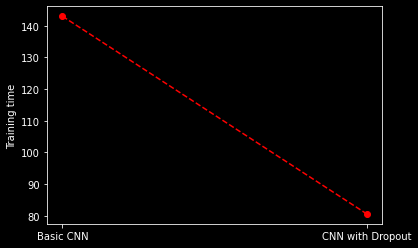

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('dark_background')
plt.plot(['Basic CNN', 'CNN with Dropout'], [basic_cnn, dropout_cnn], 'ro--')
plt.ylabel("Training time")


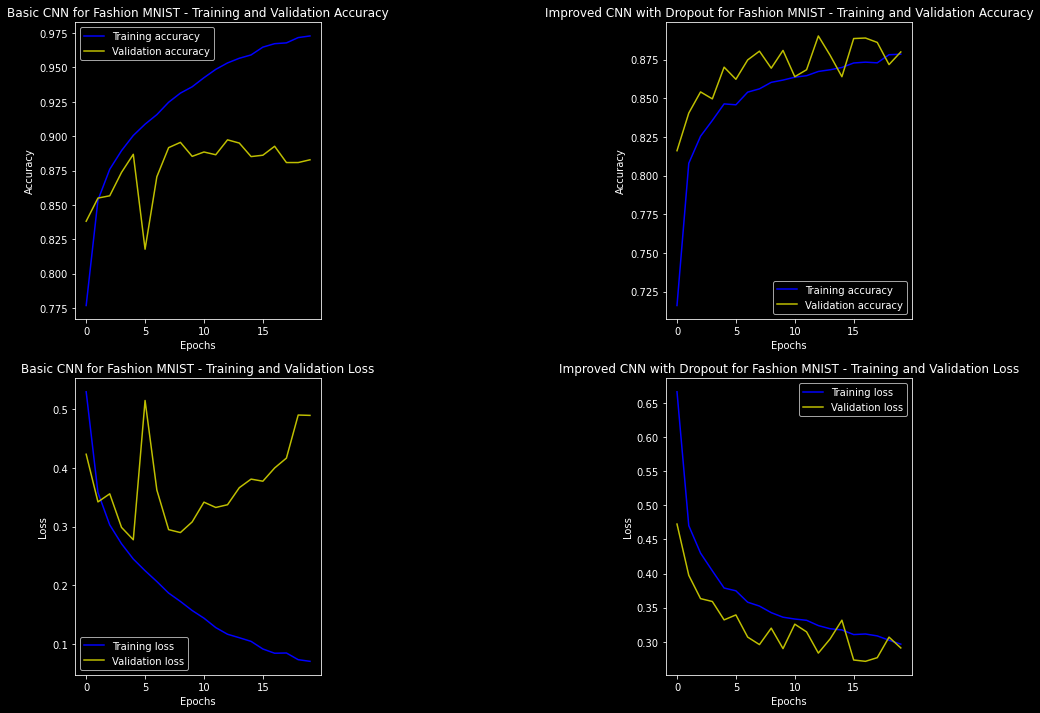

In [ ]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(15,12))
ax1 = f.add_subplot(231)
ax1.set_facecolor('black')
ax2 = f.add_subplot(234)
ax2.set_facecolor('black')
ax3 = f.add_subplot(233)
ax3.set_facecolor('black')
ax4 = f.add_subplot(236)
ax4.set_facecolor('black')


accuracy = basic_cnn_model_train_history.history['accuracy']
val_accuracy = basic_cnn_model_train_history.history['val_accuracy']
loss = basic_cnn_model_train_history.history['loss']
val_loss = basic_cnn_model_train_history.history['val_loss']
epochs = range(len(accuracy))
ax1.plot(epochs, accuracy, 'b-', label='Training accuracy')
ax1.plot(epochs, val_accuracy, 'y-', label='Validation accuracy')
ax1.set_title('Basic CNN for Fashion MNIST - Training and Validation Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

ax2.plot(epochs, loss, 'b-', label='Training loss')
ax2.plot(epochs, val_loss, 'y-', label='Validation loss')
ax2.set_title('Basic CNN for Fashion MNIST - Training and Validation Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()




accuracy = cnn_model_with_dropout_train_history.history['accuracy']
val_accuracy = cnn_model_with_dropout_train_history.history['val_accuracy']
loss = cnn_model_with_dropout_train_history.history['loss']
val_loss = cnn_model_with_dropout_train_history.history['val_loss']
epochs = range(len(accuracy))
ax3.plot(epochs, accuracy, 'b-', label='Training accuracy')
ax3.plot(epochs, val_accuracy, 'y-', label='Validation accuracy')
ax3.set_title('Improved CNN with Dropout for Fashion MNIST - Training and Validation Accuracy')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('Accuracy')
ax3.legend()

ax4.plot(epochs, loss, 'b-', label='Training loss')
ax4.plot(epochs, val_loss, 'y-', label='Validation loss')
ax4.set_title('Improved CNN with Dropout for Fashion MNIST - Training and Validation Loss')
ax4.set_xlabel('Epochs')
ax4.set_ylabel('Loss')
ax4.legend()
plt.show()

The above graphs clearly suggest that there is overfitting in the CNN model without any droput layers. We can say that because the trainign accuracy keeps increasing while the validation accuracy is slowly declining with epochs. At the same time, the model with dropout layers sees increase in both training and validation accuracies. Even more so that validation accuracy increases at a higher rate than the training accuracy. 

To support this conclusion, the graph of epochs vs loss also bears evidence. With epochs, the validation loss in increasing while the training loss is decreasing. This can be a sign that model is tending to overfit more and more with each epoch. The model with dropout layers is seeing a clear decline in both training and validation losses. 